IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')  # Assuming the file is named this

**Data Cleaning and Exploration**

In [2]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
# Check for missing values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [7]:
# Handle missing values by dropping rows with missing values
df.dropna(inplace=True)

# Verify that missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [8]:
# Check data types
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [9]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
# Ordinal encoding for ordered categories
ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                'Parental_Education_Level', 'Distance_from_Home']

ordinal_mapping = {
    'Low': 0, 'Medium': 1, 'High': 2,
    'Negative': 0, 'Neutral': 1, 'Positive': 2,
    'High School': 0, 'College': 1, 'Postgraduate': 2,
    'Near': 0, 'Moderate': 1, 'Far': 2
}

for col in ordinal_cols:
    df[col] = df[col].map(ordinal_mapping)

# One-hot for nominal categories
nominal_cols = ['Gender', 'School_Type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Binary encoding for yes/no
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [11]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,0,0,67,True,True
1,19,64,0,1,0,8,59,0,1,2,1,1,0,4,0,1,1,61,False,True
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,2,0,74,True,True
3,29,89,0,1,1,8,98,1,1,1,1,1,0,4,0,0,1,71,True,True
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,1,0,70,False,True
5,19,88,1,1,1,8,89,1,1,3,1,1,2,3,0,2,0,71,True,True
6,29,84,1,0,1,7,68,0,1,1,0,1,1,2,0,0,1,67,True,False
7,25,78,0,2,1,6,50,1,1,1,2,2,0,2,0,0,2,66,True,True
8,17,94,1,2,0,6,80,2,1,0,1,0,1,1,0,1,0,69,True,False
9,23,98,1,1,1,8,71,1,1,0,2,2,2,5,0,0,1,72,True,True


In [12]:
# Check data types
print(df.dtypes)

Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Access_to_Resources           int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
Teacher_Quality               int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Distance_from_Home            int64
Exam_Score                    int64
Gender_Male                    bool
School_Type_Public             bool
dtype: object


In [15]:
df['Gender_Male'] = df['Gender_Male'].replace({True: 1, False: 0})
df['School_Type_Public'] = df['School_Type_Public'].replace({True: 1, False: 0})

/tmp/ipython-input-3272583019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender_Male'] = df['Gender_Male'].replace({True: 1, False: 0})
/tmp/ipython-input-3272583019.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['School_Type_Public'] = df['School_Type_Public'].replace({True: 1, False: 0})


In [16]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,0,0,67,1,1
1,19,64,0,1,0,8,59,0,1,2,1,1,0,4,0,1,1,61,0,1
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,2,0,74,1,1
3,29,89,0,1,1,8,98,1,1,1,1,1,0,4,0,0,1,71,1,1
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,1,0,70,0,1


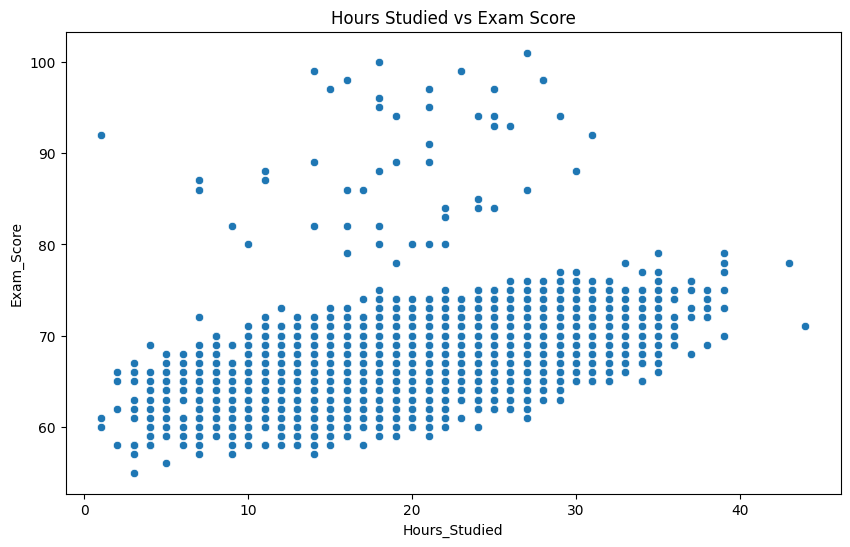

In [17]:
# Basic visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.show()

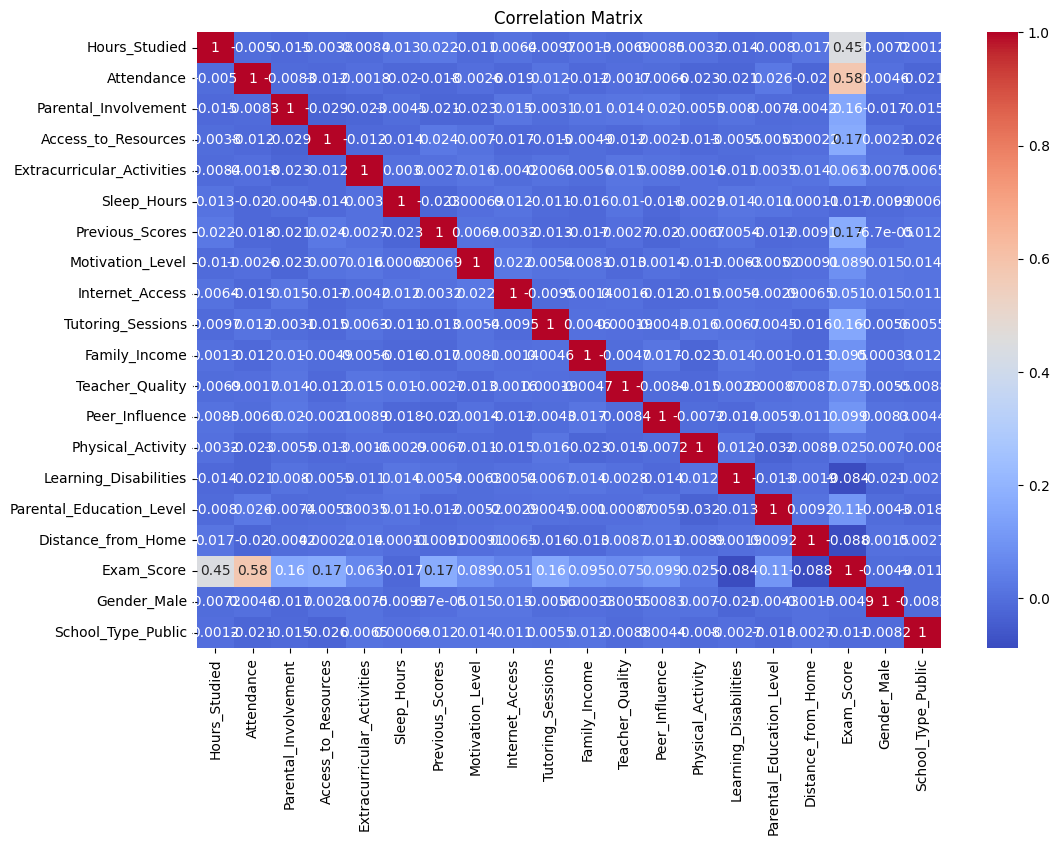

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

SPLIT THE DATA AND FIT THE MODEL

In [19]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

PREDICTIONS

In [20]:
# Predict
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(1276,)
[73.85998238 66.10531695 70.45389639 ... 62.94756414 67.08417316
 73.70419349]


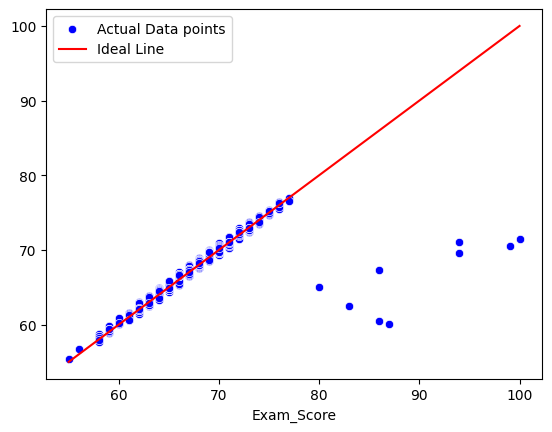

In [21]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

Multiple Linear Regression (All Features)

In [23]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Simple Linear Regression:")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Simple Linear Regression:
MSE: 4.15
R2 Score: 0.73


Polynomial Regression

In [24]:
# Polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPolynomial Regression (Degree 2):")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Polynomial Regression (Degree 2):
MSE: 4.39
R2 Score: 0.72


In [26]:
# Try different feature combinations
features_1 = ['Hours_Studied', 'Attendance', 'Previous_Scores']
features_2 = ['Hours_Studied', 'Sleep_Hours', 'Motivation_Level', 'Teacher_Quality']

for i, features in enumerate([features_1, features_2], 1):
    X = df[features]
    y = df['Exam_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nFeature Combination {i}: {features}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Feature Combination 1: ['Hours_Studied', 'Attendance', 'Previous_Scores']
MSE: 6.48
R2 Score: 0.58

Feature Combination 2: ['Hours_Studied', 'Sleep_Hours', 'Motivation_Level', 'Teacher_Quality']
MSE: 12.17
R2 Score: 0.22


Final Model Selection and Insights
Based on my evaluation metrics, here's the analysis and recommended model:

Performance Summary:
Simple Linear Regression

MSE: 4.15

R²: 0.73

Polynomial Regression (Degree 2)

MSE: 4.39

R²: 0.72

Feature Combination 1 (Hours_Studied + Attendance + Previous_Scores)

MSE: 6.48

R²: 0.58

Feature Combination 2 (Hours_Studied + Sleep_Hours + Motivation_Level + Teacher_Quality)

MSE: 12.17

R²: 0.22

Key Insights:
Simple Linear Regression performs best among all tested models:

Lowest MSE (4.15) → Most accurate predictions

Highest R² (0.73) → Explains 73% of variance in exam scores

Surprisingly outperforms more complex models

Adding complexity didn't help:

Polynomial regression (degree 2) performed slightly worse

Additional features reduced model performance


Recommended Final Model:

Simple Linear Regression